In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import getdist
from getdist import plots, loadMCSamples

%matplotlib inline

## Import chains and add derived params

In [2]:
path1 = Path("chains/vanilla/full_dr14_paper.txt")
posterior_vanilla = loadMCSamples(str(path1)[:-4])

path2 = Path("chains/L_hcd/full_dr14_paper.txt")
posterior_lhcd = loadMCSamples(str(path2)[:-4])

In [3]:
post_vanilla_mod = posterior_vanilla.copy()
p = post_vanilla_mod.getParams()
post_vanilla_mod.addDerived(1000 * p.bias_eta_siii/0.5, name='bias_siii', label=r'10^3 b_{SiIII(1207)}')

post_lhcd_mod = posterior_lhcd.copy()
p = post_lhcd_mod.getParams()
post_lhcd_mod.addDerived(1000 * p.bias_eta_siii/0.5, name='bias_siii', label=r'10^3 b_{SiIII(1207)}')

## Plot for the paper with the BAO parameters and those that are correlated with $L_{HCD}$

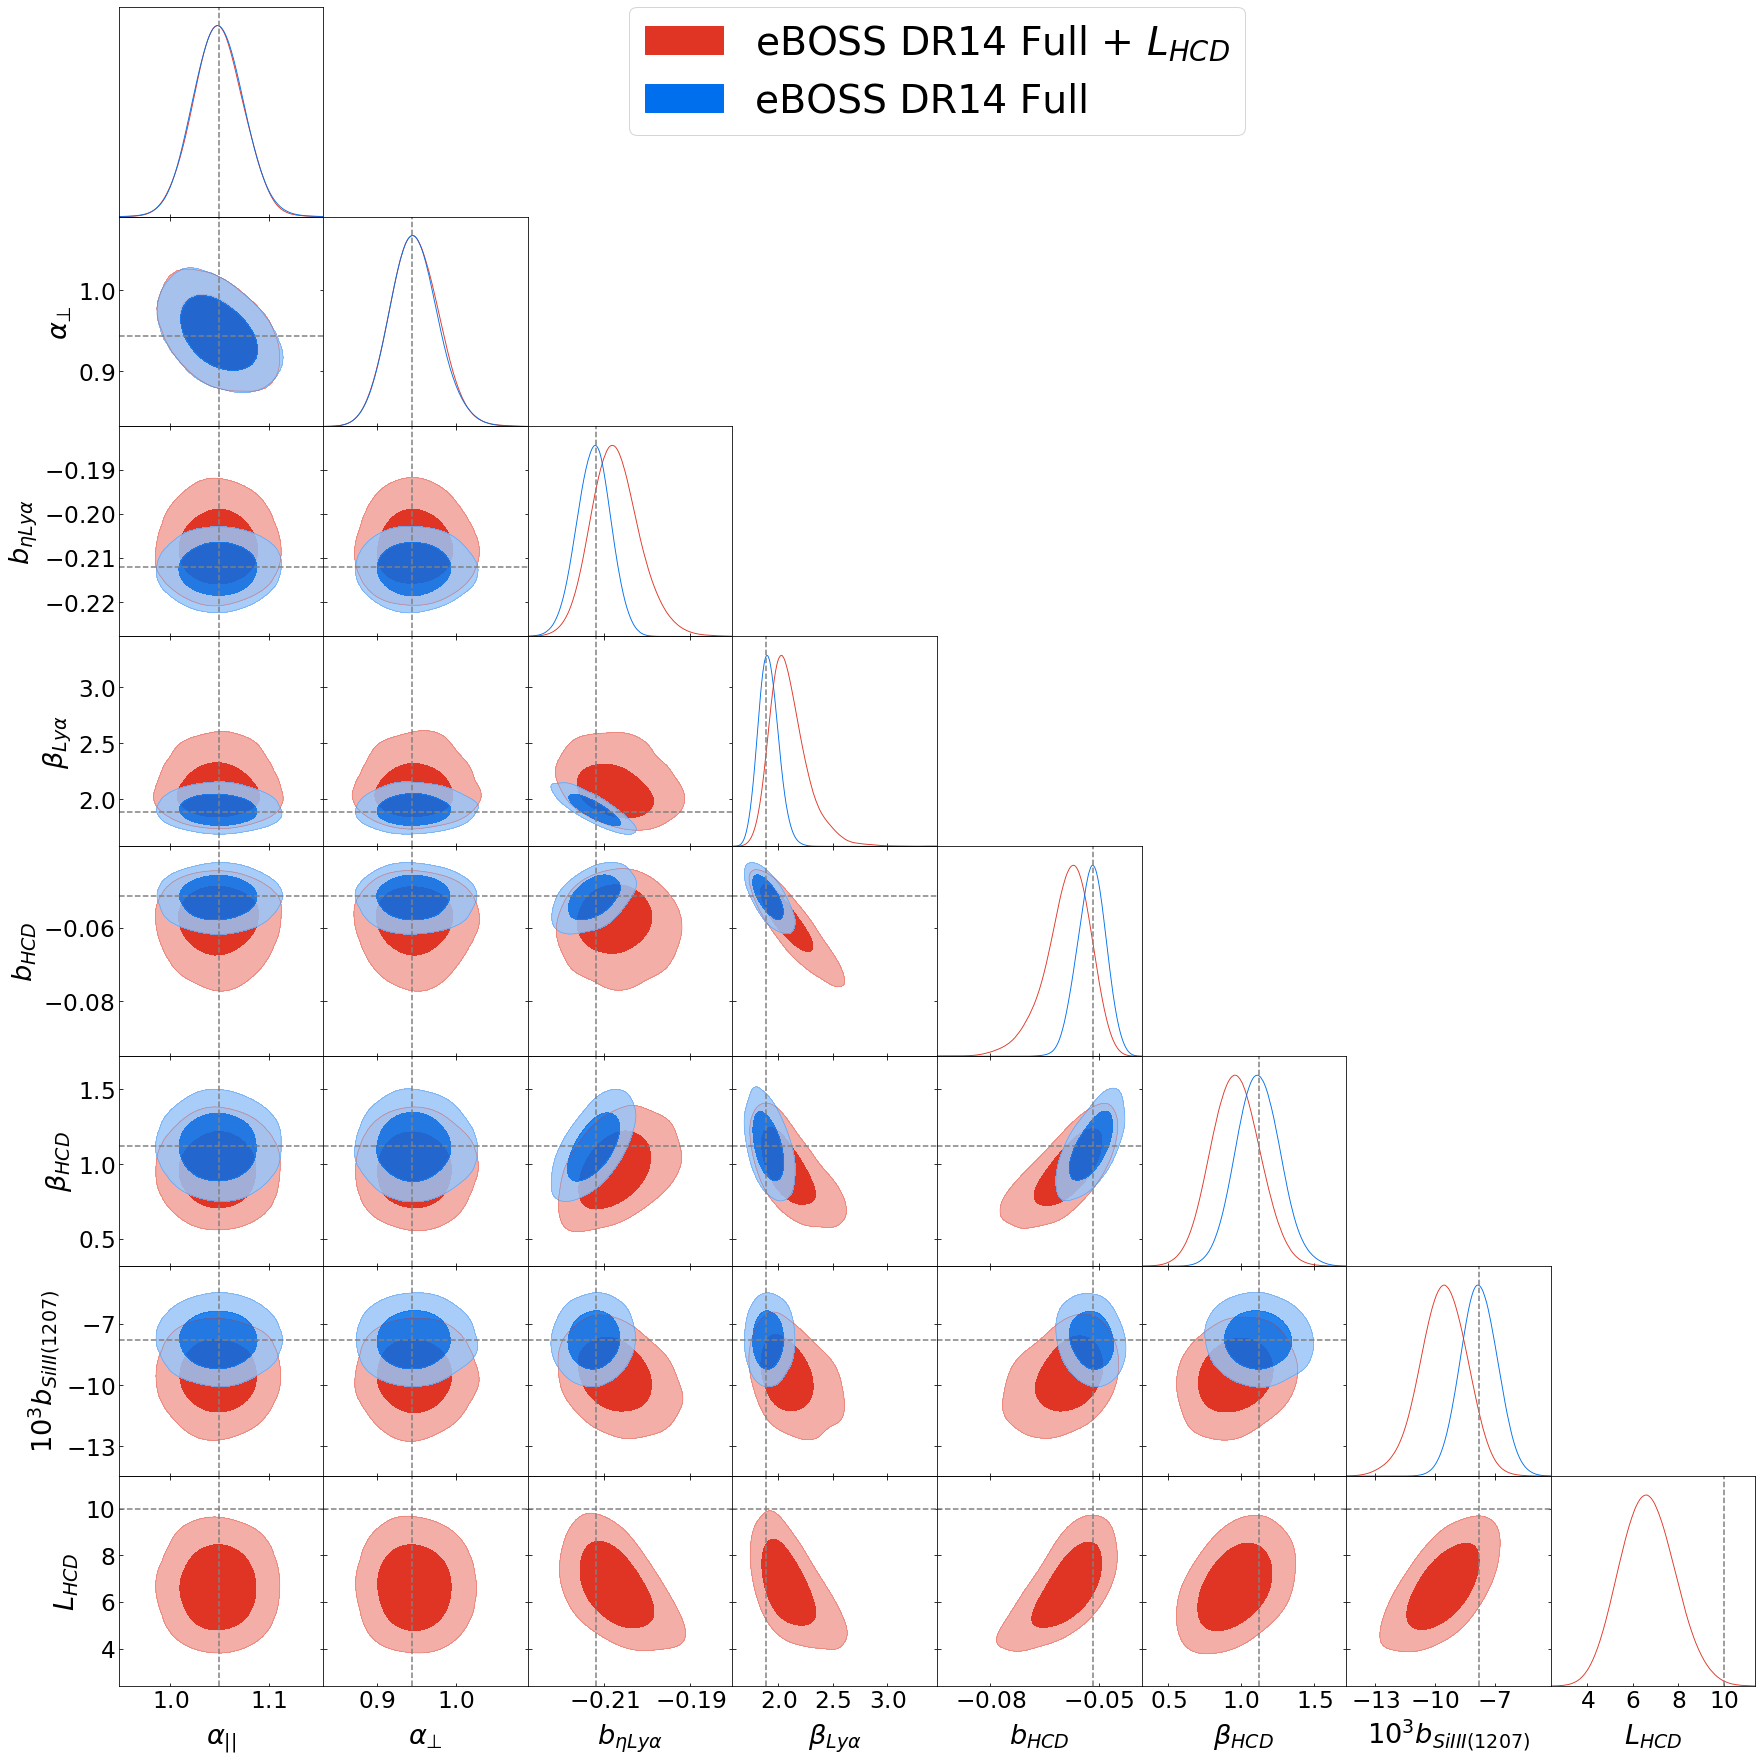

In [4]:
plt.rcParams['font.size'] = 24
g = getdist.plots.getSubplotPlotter(width_inch=25,rc_sizes = False)

g.settings.fontsize = 24
g.settings.legend_fontsize = 40
g.settings.axes_fontsize = 24
g.settings.axes_labelsize = 28

g.triangle_plot([post_lhcd_mod, post_vanilla_mod], ['ap', 'at', 'bias_eta_LYA', 'beta_LYA', 'bias_hcd_lya', 'beta_hcd','bias_siii','L_hcd'],
           filled=True, legend_labels=[ r'eBOSS DR14 Full + $L_{HCD}$', r'eBOSS DR14 Full']) 

paper_res = [1.04949, 0.94387, -0.212, 1.887, -0.0515, 1.1196, -0.003897*10**3/0.5, 10]

for i, res in enumerate(paper_res):
    for ax in g.subplots[:,i]:
        if ax is not None:
            ax.axvline(res, color='gray', ls='--')
            
for i, res in enumerate(paper_res[1:]):
    for j, ax in enumerate(g.subplots[i+1,:]):
        if ax is not None and j != (i+1):
            ax.axhline(res, color='gray', ls='--')            

## The full posterior

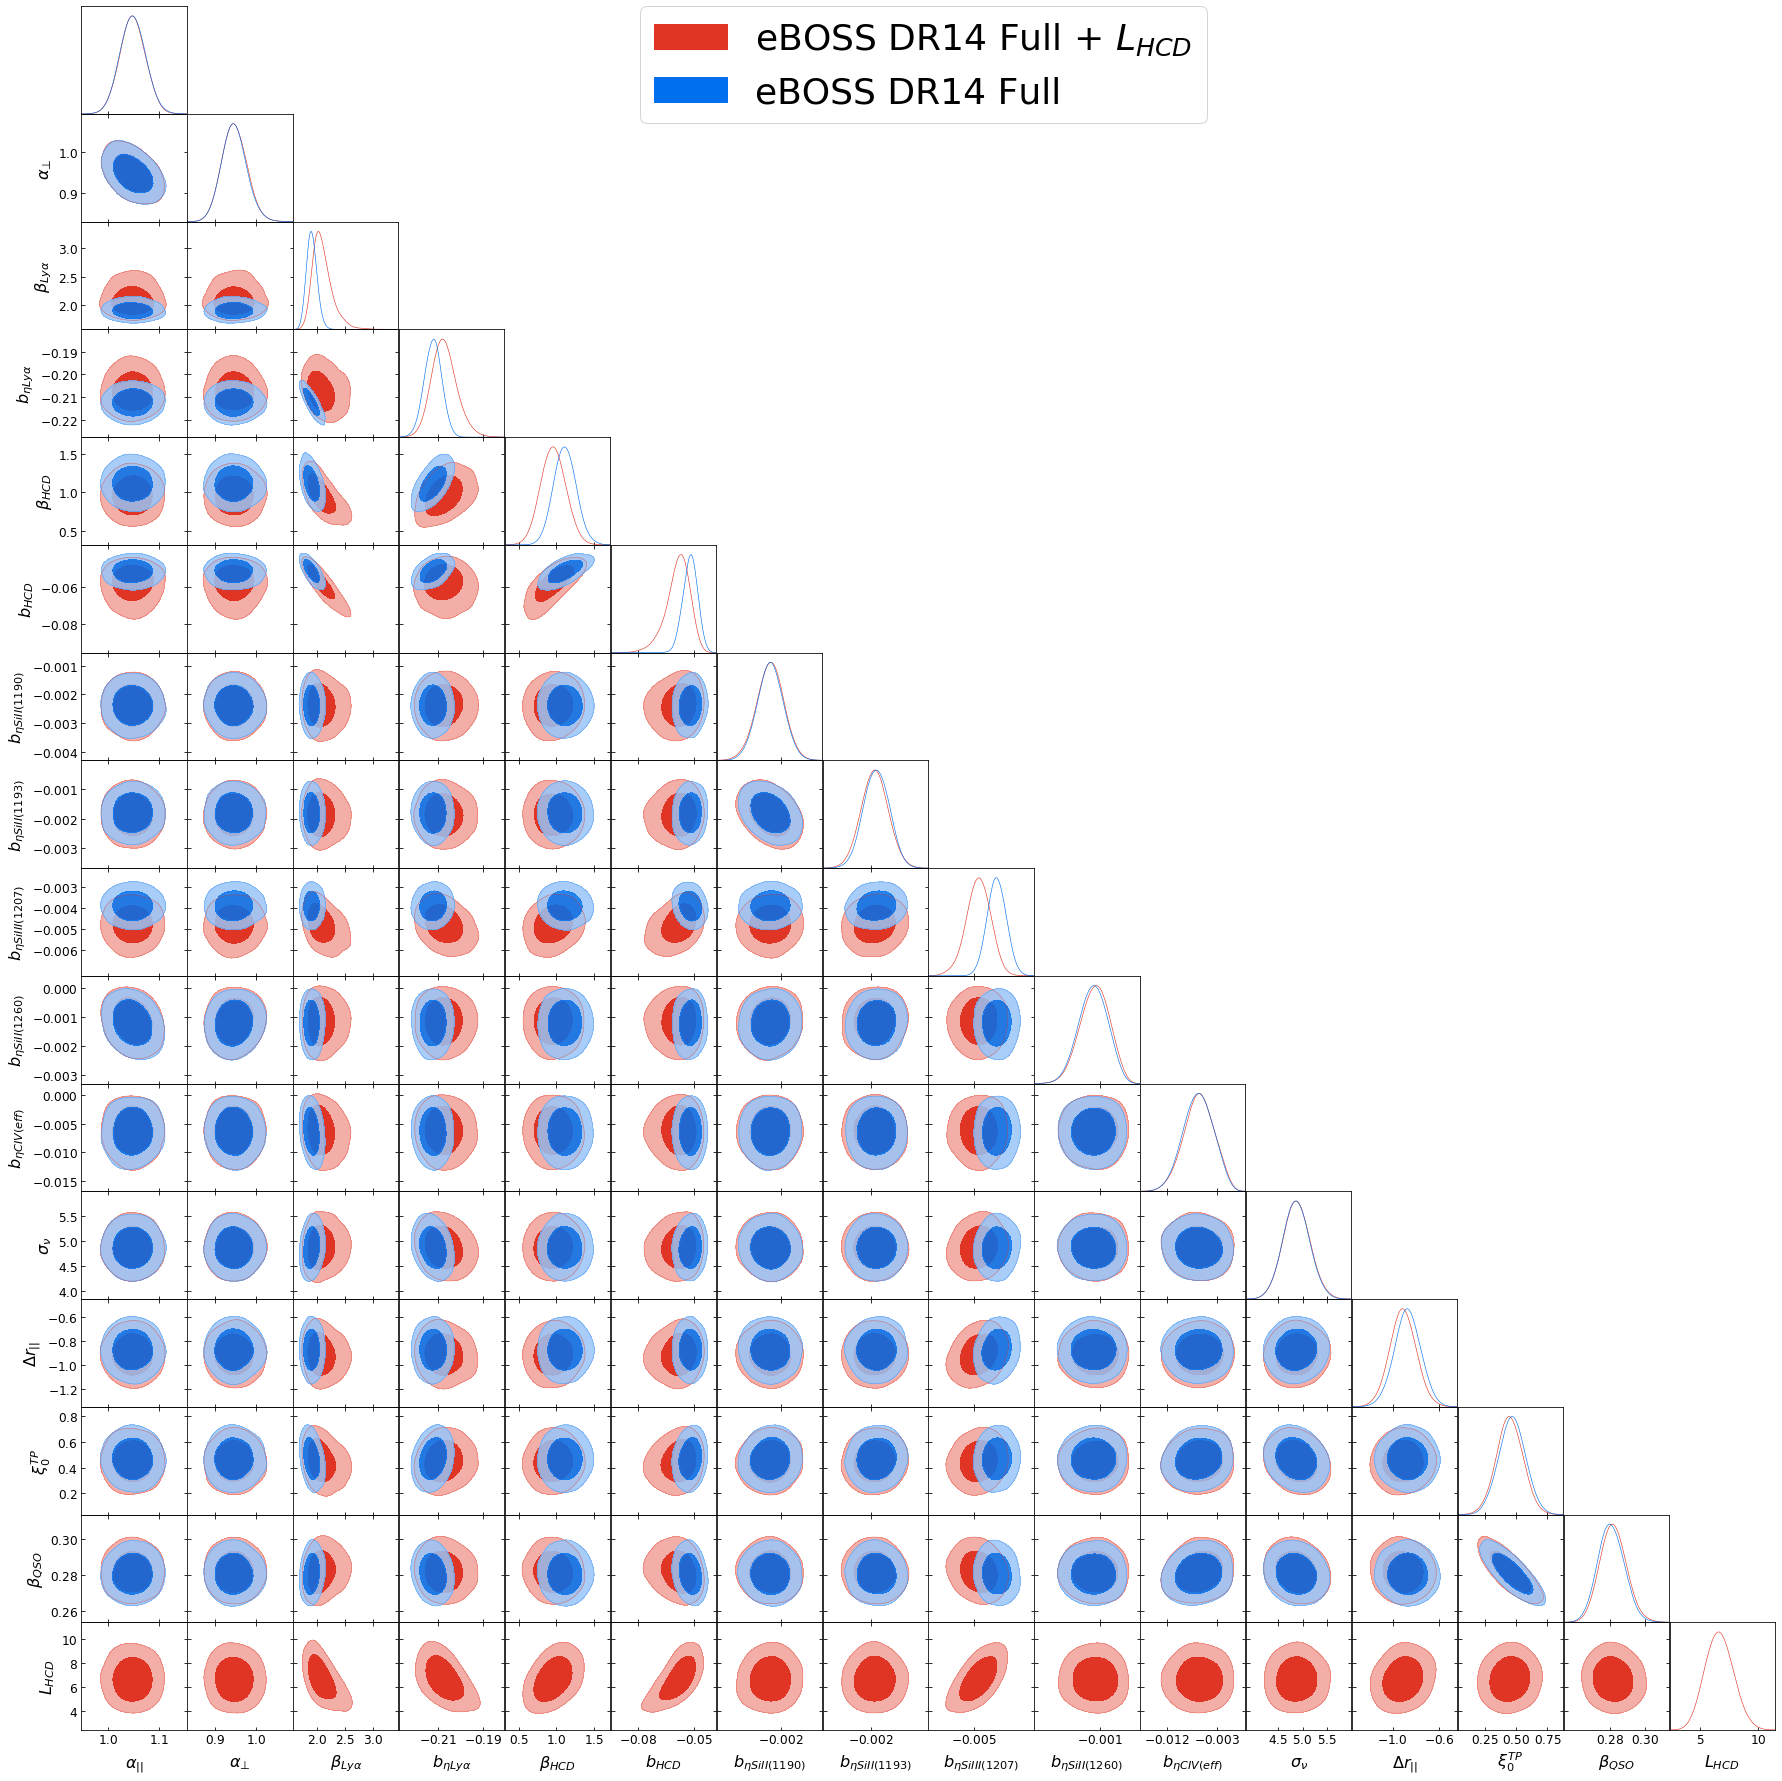

In [5]:
plt.rcParams['font.size'] = 15
g = getdist.plots.getSubplotPlotter(width_inch=25)

g.settings.fontsize = 24
g.settings.legend_fontsize = 40
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20

g.triangle_plot([post_lhcd_mod, post_vanilla_mod], ['ap','at','beta_LYA','bias_eta_LYA', 'beta_hcd','bias_hcd_lya',
                              'bias_eta_sii_1','bias_eta_sii_2','bias_eta_siii', 'bias_eta_sii_3','bias_eta_civ',
                             'sigma_nu', 'drp', 'qso_rad_strength', 'beta_qso','L_hcd'],
           filled=True, legend_labels=[ r'eBOSS DR14 Full + $L_{HCD}$', r'eBOSS DR14 Full'])